In [24]:
!pip install yfinance

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Download stock data
stocks = ['RELIANCE.NS', 'INFY.NS', 'AAPL']  # Reliance, Infosys, Apple
data = yf.download(stocks, start="2023-01-01", end="2025-01-01", auto_adjust=False)

# Access the 'Adj Close' column from the MultiIndex, or 'Close' if 'Adj Close' is not available
try:
    data = data['Adj Close']
except KeyError:
    try:
        data = data['Close']
    except KeyError:
        print("Neither 'Adj Close' nor 'Close' columns found in the MultiIndex.")
        data = None # Or handle the error appropriately


# Show first rows
if data is not None:
    print("\nFirst rows of the selected data:")
    print(data.head())

[*********************100%***********************]  3 of 3 completed


First rows of the selected data:
Ticker            AAPL      INFY.NS  RELIANCE.NS
Date                                            
2023-01-02         NaN  1427.211670  1175.889648
2023-01-03  123.330650  1425.853638  1167.284668
2023-01-04  124.602707  1399.866089  1149.709595
2023-01-05  123.281334  1381.510864  1147.655396
2023-01-06  127.817352  1356.506714  1158.086304


In [33]:
#Calculate Daily Returns
returns = data.pct_change().dropna()
print(returns.head())


Ticker          AAPL   INFY.NS  RELIANCE.NS
Date                                       
2023-01-04  0.010314 -0.018226    -0.015056
2023-01-05 -0.010605 -0.013112    -0.001787
2023-01-06  0.036794 -0.018099     0.009089
2023-01-09  0.004089  0.024819     0.023611
2023-01-10  0.004456 -0.009903    -0.014787


/tmp/ipython-input-1497776865.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


/tmp/ipython-input-1103488833.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  reliance = yf.download('RELIANCE.NS', start="2023-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


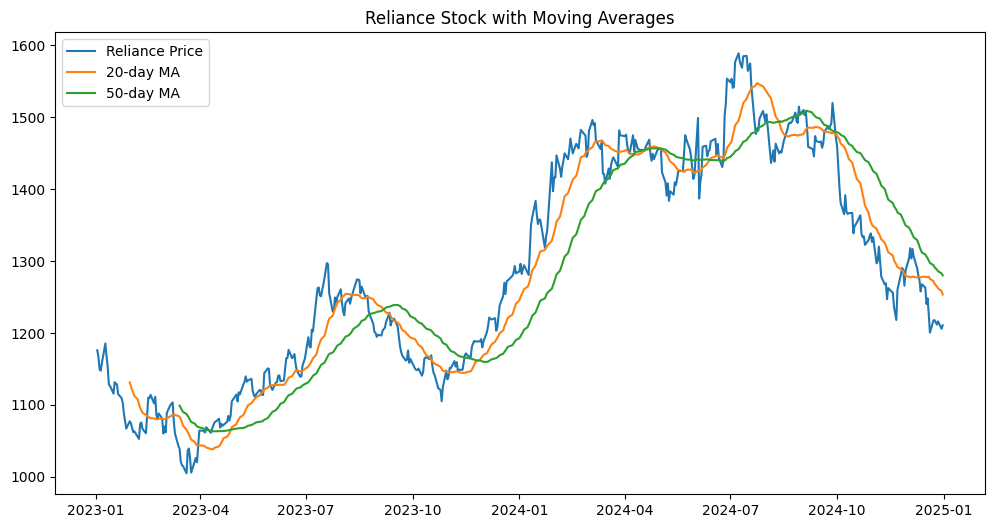

In [32]:
#Moving Averages
reliance = yf.download('RELIANCE.NS', start="2023-01-01", end="2025-01-01")
reliance['MA20'] = reliance['Close'].rolling(20).mean()
reliance['MA50'] = reliance['Close'].rolling(50).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(reliance['Close'], label='Reliance Price')
plt.plot(reliance['MA20'], label='20-day MA')
plt.plot(reliance['MA50'], label='50-day MA')
plt.legend()
plt.title("Reliance Stock with Moving Averages")
plt.show()

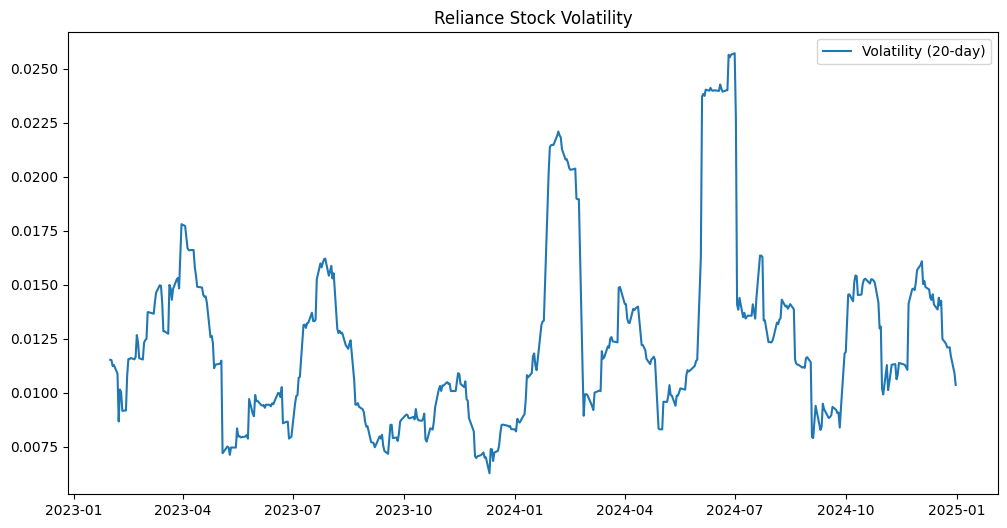

In [29]:
# Rolling 20-day volatility for Reliance
reliance['Volatility'] = reliance['Close'].pct_change().rolling(20).std()

plt.figure(figsize=(12,6))
plt.plot(reliance['Volatility'], label='Volatility (20-day)')
plt.legend()
plt.title("Reliance Stock Volatility")
plt.show()

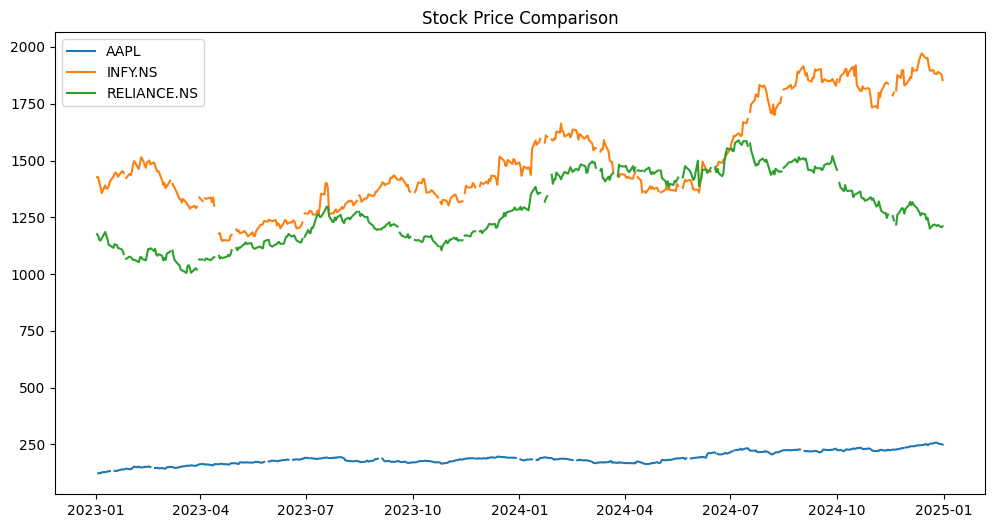

In [31]:
#Compare Stocks
plt.figure(figsize=(12,6))
for stock in data.columns:
    plt.plot(data[stock], label=stock)
plt.legend()
plt.title("Stock Price Comparison")
plt.show()
